What we are currently having:

 * a **dataset** with examples $x$ and associated target values $y$
 * a **model** $f(x)$ to that can make prediction given some $x$
 * a **loss function** L that measure how good model predictions are

The next step is to find model **parameters** that result in a low loss over the dataset.

Remember the MNIST classification example:

$$
\begin{align}
z & = relu(W_1 \cdot x + b_1) \\
f(x) & = softmax(W_2 \cdot z + b_2)
\end{align}
$$

In this expression, $W_1$, $W_2$, $b_1$ and $b_2$ are the parameters of the model. 

For convenience we will denote the parameter of a model as $\theta$. 

In our example $\theta = \{W_1, W_2, b_1, b_2 \}$.

Initially the parameters are filled with random values. 

Obviously the model will not predict anything useful in this state.

**Optimization** refers to the task of minimizing the loss function $L(x, y, \theta)$ by altering $\theta$.

We'll take advantage of the fact that all model operations are differentiable.

We'll compute the **gradient** of the loss function with respect to the model's parameters, this will tell us how to update the parameters to decrease the loss.

## Derivative of a function

Suppose we have a function $y=f(x)$, where both $x$ and $y$ are real numbers.

The derivative of this function is denoted as:

$$f'(x) = \frac{d}{dx}f(x) = \frac{d f(x)}{dx}$$

$\frac{d}{dx}$ is called the **differential operator**. 

You can think of $\frac{d}{dx}$ as an operator that maps a function to the derivative of the function.

The derivative $\frac{d}{dx} f(x)$ gives the **slope** of $f(x)$ at the point $x$.


In other words is specifies how the value of $f(x)$ changes if we increase $x$ by a small amount.

If the derivative is **negative**, a small increase of x will result in a decrease of f(x). 

If the derivative is **positive**, a small increase of x will result in an increase of f(x). 

Further, the **absolute value** of the derivative tells you how quickly this increase or decrease will happen.

Lets look at an example for a derivative: $f(x) = x^2 + 3x$

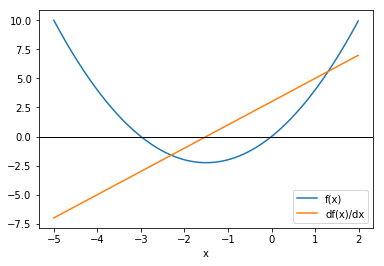

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def f(x): return x**2 + 3 * x

def df_dx(x): return 2 * x + 3

x = np.arange(-5, 2, 0.01)
plt.xlabel('x')
plt.plot(x, f(x), label='f(x)')
plt.plot(x, df_dx(x), label='df(x)/dx')
plt.axhline(linewidth=1, color='black')
plt.legend()
plt.show()

The derivative is useful for minimizing a function because it tells us how to change $x$ in order to make a small decrease in y.

The example function has the global minimum at $x=-1.5$

For $x>-1.5$ the derivative is positive and we can decrease $f(x)$ by decreasing $x$.

For $x<-1.5$ the derivative is negative and we can decrease $f(x)$ by increasing $x$.


## Local and global minima

A **local minimum** is a point where f(x) is lower than all neighboring points, so it is no longer possible to decrease f(x) by making small steps.

A point that obtains the absolute lowest value of $f(x)$ is a **global minimum**.

Optimization algorithms may fail to ﬁnd a global minimum when there are multiple local minima present. 

In the context of machine learning, we generally accept such solutions even though they are not truly minimal, as long as they correspond to low values of the cost function.

## Partial derivative

When a function $f(x)$ has multiple inputs $x = [x_1,...,x_n]$, each input contributes to the value of the function and it does not make sense to have a single derivative. 

Instead we compute derivatives with respect to one input at a time, these are called **partial derivatives**.


**Note:** When a function has multiple inputs it is preferable to use a vector $x = [x_1,...,x_n]$ as input instead of $f(x_1,...,x_n)$. This makes the function more generic and also allows to take advantage of vectorized operations in CPUs and GPUs.

Instead of the differential operator $\frac{d}{dx}$, we use the **partial differential operator** $ \frac{\partial}{\partial x_i}$.

$\frac{\partial}{\partial x_i} f(x)$ measures how $f$ changes as only the variable $x_i$ increases at point x.

$\frac{\partial}{\partial x_i} f(x)$ is calculated just like the derivative for a single variable function, simply treating any variable other than $x_i$ in the equation as a constant.

The **gradient** of $f$ is the vector containing all the partial derivatives, denoted $\nabla f(x)$.

$$
\nabla_x f(x) = \left [ \frac{\partial}{\partial x_1}f(x),..., \frac{\partial}{\partial x_n}f(x) \right ]
$$

The operator $\nabla_x f(x)$ is called **nabla**.

Lets look at an example: 

$f(x)=x_1^2 + x_2^3 + 5x_2$

The partial derivatives are:

$\frac{\partial}{\partial x_1}f(x) = 2 x_1$

$\frac{\partial}{\partial x_2}f(x) = 3 x_2^2 + 5$

And the gradient is:

$\nabla_x f(x) = \left [ 2 x_1, 3 x_2^2 + 5 \right ]$

In [6]:
import numpy as np

def f(x): 
    return x[0]**2 + x[1]**3 + 5 * x[1]

def grad_f(x): 
    df_dx1 = 2 * x[0]
    df_dx2 = 3 * x[1]**2 + 5
    return np.array([df_dx1, df_dx2])


## Gradient based optimization

The gradient of $f(x)$ at some point $x$ is a vector that points into the direction of the greatest increase.

Very much like the derivative before, the gradient can be used to minimize a function because it tells us how to change every $x_i$ in order to make a small decrease in $f(x)$.

We can decrease $f$ by moving a **small step** in the direction of the **negative gradient**.

Its important to only take a small step because the gradient is only a good approximation of $f(x)$ in its immediate surrounding of $x$.

This is known **gradient descent**.

Gradient descent proposes the following update rule for $x$:

$$ x' = x - \alpha \nabla_x f(x) $$

$\alpha$ is called the **learning rate**, a positive scalar determining the size of the step.

Gradient descent is an iterative algorithm.

We can find a minimum of $f(x)$ by repeating the update rule until all elements in the gradient of $f(x)$ are (near) zero.

Lets look at an example to see how this works:

We have a function $f(x) = x_1^2 + x_2^3 + 3$. 

The function is convex and has a global minimum as $x=[0,0]$.

Final x=[-0.02980977 -0.0162386 ]
Final f(x)=3.001152


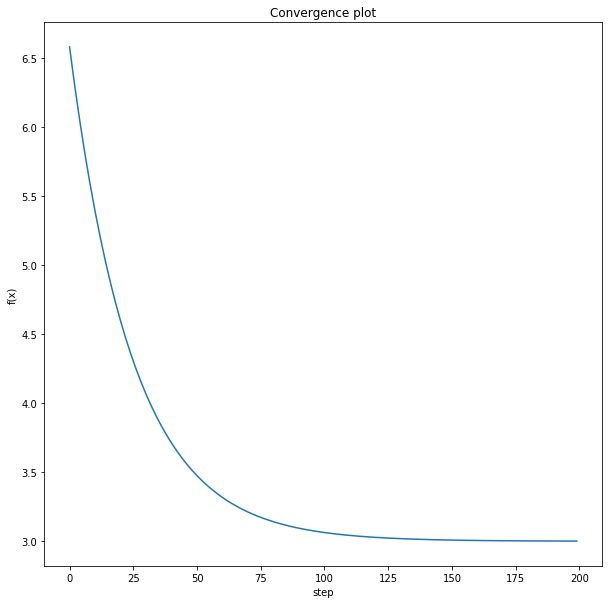

In [4]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# f(x) is the function we want to minimize
def f(x):
    return x[0]**2 + x[1]**2 + 3

# Gradient of f(x)
def grad_f(x):
    return np.array([2 * x[0], 2 * x[1]])

max_steps = 200
alpha = 0.01

# x is initialized randomly
initial_x = np.random.rand(2) * 5.0 - 2.5

x = initial_x
f_hist = []
for step in range(max_steps):
    # calculate the gradient at x and update x
    # in the direction of the negative gradient
    x = x - alpha * grad_f(x)
    f_hist.append(f(x))
    
print('Final x=%s' % x)
print('Final f(x)=%f' % f(x))

plt.figure(figsize=(10,10))
plt.title('Convergence plot')

plt.xlabel('step')
plt.ylabel('f(x)')
plt.plot(f_hist)
plt.show()


You can see from the plot that at some step the value of $f(x)$ does not change any more, the process has converged.

The example implementation of gradient descent is very simple.

State-of-the-art implementation are highly optimized and take advantage of hardware accelerators like vectorized CPU operations, GPUs or TPUs.

## Model optimization

Now we can come back to the initial question how to find model parameters $\theta$ that minimize the loss function $L$ of a model $f(x)$.

The loss function takes as input $x$, $y$ and $\theta$, so we can write it as $L(x, y, \theta)$.

For optimization we must only update the parameters $\theta$.  $x$ and $y$ are facts that we have observed and that can not be changed.

To minimize the loss function we use gradient descent with the following update rule:

$$ \theta_{n+1} = \theta_{n} - \alpha \nabla_{\theta} L(x,y;\theta_n) $$

Note the subscript on the nabla operator, the gradient only contains the partial derivatives of the loss w.r.t. $\theta$ and not w.r.t. the observations $x$ and $y$.

To train the model we perform the following steps:

 1. Initialize $\theta_0$ with small random values
 2. Draw $x$ and $y$ from the dataset
 3. Calculate $\hat y = f(x)$
 4. Calculate the gradient of the loss function w.r.t. $\theta_n$
 5. Update all parameters according to the update rule $\theta_{n+1} = \theta_{n} - \alpha \nabla_\theta L(x, y;\theta_{n})$
 6. Repeat from step 2 until loss change stays below some threshold
 
Take a look at the next notebook for an example. 